['', 'trial', 'val_basic', 'delay', 'val_prc', 'response', 'RT', 'respSide', 'sideNOW', 'Version', 'loopID', 'Context']


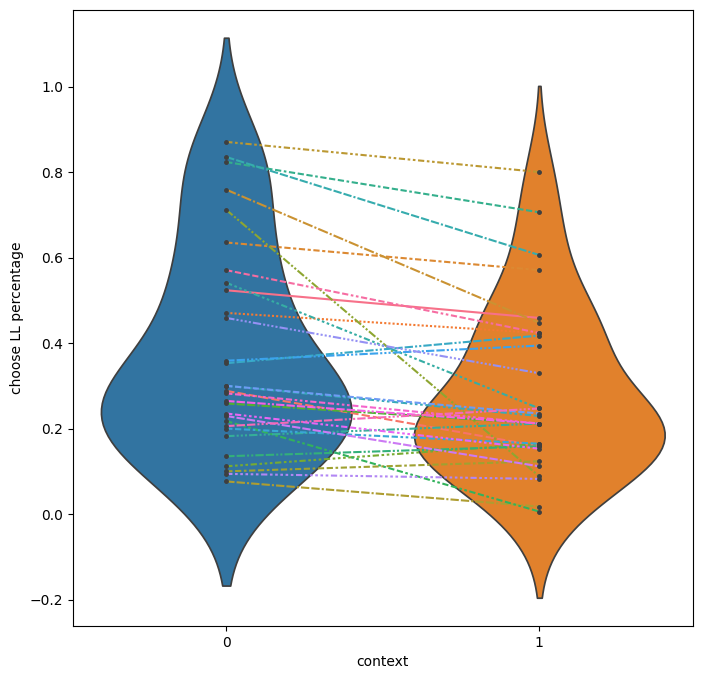

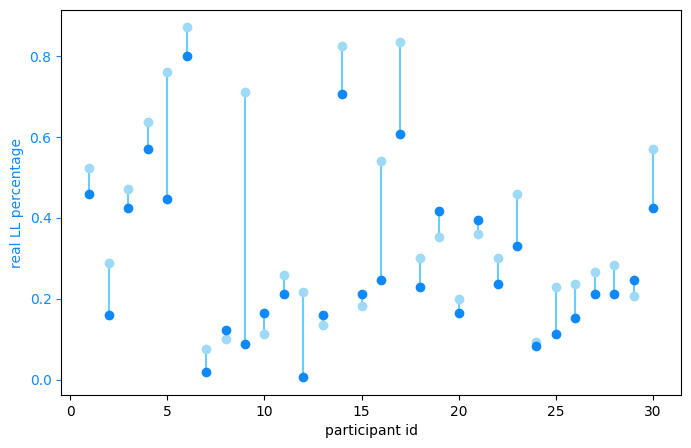

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 13 2024

@author: Yaning
Data from Ben
Data file name: intertemporal_choice_dataset_all_trials.csv
"""

# get the real percentage of the participants
%run Documents/pyro_models/files_to_run/percentage_comparison.ipynb
# %run Documents/pyro_models/files_to_run/data_analysis(matlab_dataset).ipynb

import math
import os
# from turtle import position
import torch
import torch.distributions.constraints as constraints
import pyro
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO, Predictive
import pyro.distributions as dist
from tqdm import tqdm
import matplotlib.pyplot as plt
from statistics import mean 
# import pandas as pd
import numpy as np
import scipy.stats as stats 
import pickle

In [2]:
# trial_num = data.shape[2]
# info_num = data.shape[3]
trial_num = data.shape[-2]
info_num = data.shape[-1]
real_percentages = []

for i in data:
    context_percentages = []
    for j in i:
        context_percentages.append(len(list(filter(lambda x: (x == 1), j[:,4]))
                ) / len(j))
    real_percentages.append(context_percentages)

line_data = []
for i,j in zip(real_percentages[0], real_percentages[1]):
    line_data.append([i,j])

In [42]:
# load inferred parameters
with open('Documents/pyro_models/files_to_run/results/logistic_sigma_rate_no_meanu_only_b.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

In [3]:
# load inferred parameters
with open('Documents/pyro_models/files_to_run/results/logistic_cafe_big_gap.pkl', 'rb') as f:
    pos_dict_cafe_big = pickle.load(f)

with open('Documents/pyro_models/files_to_run/results/logistic_gamble_big_gap.pkl', 'rb') as f:
    pos_dict_gamble_big = pickle.load(f)

with open('Documents/pyro_models/files_to_run/results/logistic_cafe_small_gap.pkl', 'rb') as f:
    pos_dict_cafe_small = pickle.load(f)

with open('Documents/pyro_models/files_to_run/results/logistic_gamble_small_gap.pkl', 'rb') as f:
    pos_dict_gamble_small = pickle.load(f)

In [4]:
# higher = pos_dict['m']
higher_cafe_big = pos_dict_cafe_big['m']
higher_gamble_big = pos_dict_gamble_big['m']
higher_cafe_small = pos_dict_cafe_small['m']
higher_gamble_small = pos_dict_gamble_small['m']

In [5]:
higher_cafe_big

array([ 1.031751  ,  1.5684261 ,  1.9525986 , -0.80290633,  1.7293242 ,
        0.9928497 ], dtype=float32)

In [5]:
# a_higher = np.exp(higher[3])
# b_higher = np.exp(higher[4])
# c_higher = np.exp(higher[5])
a_higher_cafe_big = np.exp(higher_cafe_big[3])
b_higher_cafe_big = np.exp(higher_cafe_big[4])
a_higher_gamble_big = np.exp(higher_gamble_big[3])
b_higher_gamble_big = np.exp(higher_gamble_big[4])

a_higher_cafe_small = np.exp(higher_cafe_small[3])
b_higher_cafe_small = np.exp(higher_cafe_small[4])
a_higher_gamble_small = np.exp(higher_gamble_small[3])
b_higher_gamble_small = np.exp(higher_gamble_small[4])

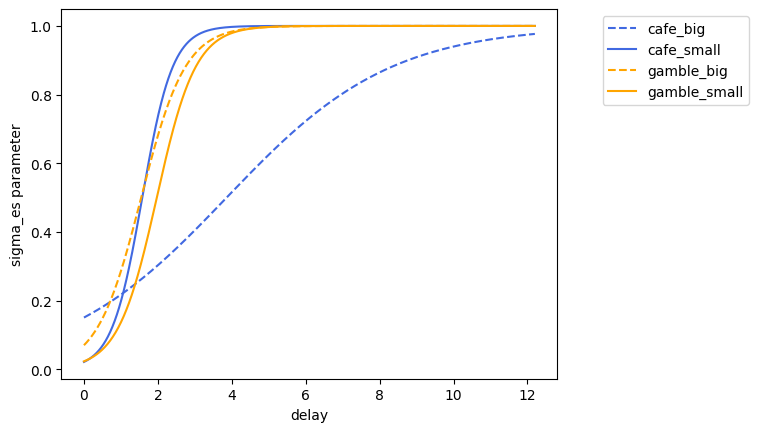

In [14]:
x = np.linspace(0,12.2, 1000)
# y = a_higher/(1+b_higher/x)

y_cafe_big = 1/(1+b_higher_cafe_big*np.exp(-a_higher_cafe_big*x))
y_gamble_big = 1/(1+b_higher_gamble_big*np.exp(-a_higher_gamble_big*x))
y_cafe_small = 1/(1+b_higher_cafe_small*np.exp(-a_higher_cafe_small*x))
y_gamble_small = 1/(1+b_higher_gamble_small*np.exp(-a_higher_gamble_small*x))

# y = c_higher/(1+b_higher*np.exp(-a_higher*x))

plt.xlabel('delay')
plt.ylabel('sigma_es parameter')
plt.plot(x,y_cafe_big, label = 'cafe_big', color='royalblue', linestyle= '--')
plt.plot(x,y_cafe_small, label = 'cafe_small', color='royalblue')
plt.plot(x,y_gamble_big, label = 'gamble_big', color='orange', linestyle= '--')
plt.plot(x,y_gamble_small, label = 'gamble_small', color='orange')
# plt.plot(x,y_cafe, label='cafe')
# plt.plot(x,y_gamble, label='gamble')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))


In [15]:
mean_u_cafe_big = np.exp(higher_cafe_big[0])
mean_u_gamble_big = np.exp(higher_gamble_big[0])
mean_u_cafe_small = np.exp(higher_cafe_small[0])
mean_u_gamble_small = np.exp(higher_gamble_small[0])

sigma_u_cafe_big = np.exp(higher_cafe_big[1])
sigma_u_gamble_big = np.exp(higher_gamble_big[1])
sigma_u_cafe_small = np.exp(higher_cafe_small[1])
sigma_u_gamble_small = np.exp(higher_gamble_small[1])

sigma_es_cafe_big = np.exp(higher_cafe_big[2])
sigma_es_gamble_big = np.exp(higher_gamble_big[2])
sigma_es_cafe_small = np.exp(higher_cafe_small[2])
sigma_es_gamble_small = np.exp(higher_gamble_small[2])

In [ ]:
for i in x:
    print(i)

In [ ]:
for i in stats.norm.pdf(x, 40., sigma_es_gamble_small*0.5):
    print(i)

In [67]:
mean_u_gamble_big

1.1644695

In [25]:
x = np.linspace(-10, 80, 1000)
plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_cafe_big, sigma_u_cafe_big),
                            stats.norm.pdf(x, 40., sigma_es_cafe_big*3.81))), 
                            label='cafe', color='royalblue', linestyle='--',
                            linewidth=1)

plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_gamble_big, sigma_u_gamble_big),
                            stats.norm.pdf(x, 40., sigma_es_gamble_big*3.81))), 
                            label = 'gamble', color='orange', linestyle='--',
                            linewidth=1)

plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_cafe_small, sigma_u_cafe_small),
                            stats.norm.pdf(x, 40., sigma_es_cafe_big*3.81))), 
                            label='cafe', color='royalblue',
                            linewidth=1)

plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_gamble_small, sigma_u_gamble_small),
                            stats.norm.pdf(x, 40., sigma_es_gamble_big*3.81))), 
                            label = 'gamble', color='orange',
                            linewidth=1)


plt.legend()

plt.show()


NameError: name 'mean_u_cafe_big' is not defined

In [4]:
higher = pos_dict['m']

In [5]:
higher

array([ 0.6778118 ,  0.13300611, -0.12732847, -1.475323  ,  0.43478504,
       -0.27208808,  0.25111756], dtype=float32)

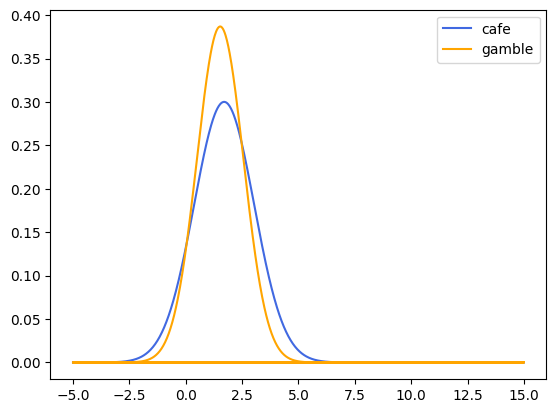

In [33]:
# mean_u_cafe = higher[0]
# mean_u_gamble = higher[0] + higher[4]

# sigma_u_cafe = np.exp(higher[1])
# sigma_u_gamble = np.exp(higher[1] + higher[5])

# sigma_es_cafe = np.exp(higher[2])
# sigma_es_gamble = np.exp(higher[2] + higher[6])

x = np.linspace(-5, 15, 1000)
plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_cafe, sigma_u_cafe),
                            stats.norm.pdf(x, 40., sigma_es_cafe*3.81))), label='cafe', color='royalblue')

plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_gamble, sigma_u_gamble),
                            stats.norm.pdf(x, 40., sigma_es_gamble*3.81))), label = 'gamble', color='orange')

plt.legend()

plt.show()


In [21]:
prior_cafe = stats.norm.pdf(x, 40., sigma_es_cafe)
prior_gamble = stats.norm.pdf(x, 40., sigma_es_gamble)

In [22]:
sample_prior_cafe = np.random.choice(prior_cafe, size=30, replace=False)
sample_prior_gamble = np.random.choice(prior_gamble, size=30, replace=False)

In [23]:
t_statistic, p_value = stats.ttest_ind(sample_prior_cafe, sample_prior_gamble)

In [24]:
p_value

0.518652099822579

In [13]:
t_statistic = (40 - mean_u_gamble) / np.sqrt((sigma_u_cafe**2 / 30) + (sigma_es_gamble**2 / 30))

In [14]:
t_statistic

132.45946526887963

In [27]:
# load inferred parameters
with open('Documents/pyro_models/files_to_run/results/logistic_cafe.pkl', 'rb') as f:
    pos_dict_cafe = pickle.load(f)

with open('Documents/pyro_models/files_to_run/results/logistic_gamble.pkl', 'rb') as f:
    pos_dict_gamble = pickle.load(f)

In [29]:
higher_cafe = pos_dict_cafe['m']
higher_gamble = pos_dict_gamble['m']

In [30]:
mean_u_cafe = higher_cafe[0]
sigma_u_cafe = higher_cafe[1]
sigma_es_cafe = higher_cafe[2]

mean_u_gamble = higher_gamble[0]
sigma_u_gamble = higher_gamble[1]
sigma_es_gamble = higher_gamble[2]

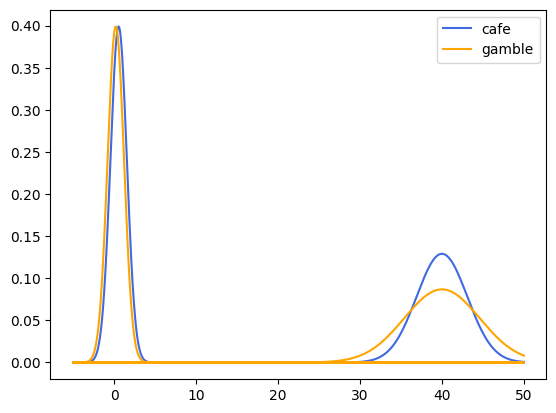

In [379]:
# x = np.linspace(-5, 50, 1000)
# plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_cafe, sigma_u_cafe),
#                             stats.norm.pdf(x, 40., sigma_es_cafe*3.81))), label='cafe', color='royalblue')

# plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_gamble, sigma_u_gamble),
#                             stats.norm.pdf(x, 40., sigma_es_gamble*3.81))), label = 'gamble', color='orange')

# plt.legend()

# # plt.text(5.5, 2, 'Line 1', color='blue', fontsize=12)
# plt.show()

sigma_constant = 1
sigma_u_cafe = 1.
sigma_u_gamble = 1.
sigma_es_cafe = sigma_u_cafe*sigma_rate_cafe
sigma_es_gamble = sigma_u_gamble*sigma_rate_gamble
x = np.linspace(-5, 50, 1000)
plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_cafe, sigma_u_cafe),
                            stats.norm.pdf(x, 40., sigma_es_cafe*3.81))), label='cafe', color='royalblue')

plt.plot(np.concatenate((x,x)), np.concatenate((stats.norm.pdf(x, mean_u_gamble, sigma_u_gamble),
                            stats.norm.pdf(x, 40., sigma_es_gamble*3.81))), label = 'gamble', color='orange')

plt.legend()

plt.show()



In [62]:
from scipy.stats import f
f_statistic = sigma_u_gamble_small**2/sigma_u_gamble_big**2
p_value = 2 * min(f.cdf(f_statistic, 20, 10), 1 - f.cdf(f_statistic, 20, 10))

In [63]:
p_value

0.08225812490345641

In [90]:
pos_params = np.concatenate((pos_dict_cafe['m_locs'], pos_dict_gamble['m_locs']))

In [43]:
pos_params = pos_dict['m_locs']

In [17]:
pos_params[:,4]

array([1.4278257 , 1.701426  , 1.079891  , 0.8591504 , 2.086838  ,
       0.07990602, 1.9401594 , 2.5079257 , 0.6678452 , 2.5439818 ,
       1.7545725 , 1.5431488 , 2.4880269 , 1.7495697 , 1.8450553 ,
       1.011264  , 1.1952529 , 1.8038956 , 1.3264214 , 2.2822883 ,
       1.2331319 , 2.4713938 , 1.791827  , 1.9394155 , 2.1057575 ,
       2.213384  , 1.9152377 , 2.0680707 , 2.1327553 , 1.3205057 ,
       1.491822  , 1.2301062 , 1.8378466 , 1.0655264 , 1.7401967 ,
       1.7425961 , 1.9500247 , 1.8279399 , 1.5634608 , 2.1038432 ,
       2.3420906 , 1.4399225 , 1.2451661 , 1.8169713 , 1.8067195 ,
       1.9820089 , 0.9211577 , 2.1559737 , 0.9742406 , 1.9951501 ,
       2.105875  , 2.2290945 , 0.79232574, 1.8816305 , 2.3321753 ,
       2.3296242 , 2.298944  , 2.2621703 , 2.4222176 , 2.1361153 ],
      dtype=float32)

In [426]:
pos_params_cafe = pos_dict_cafe['m_locs']
pos_params_gamble = pos_dict_gamble['m_locs']

In [44]:
# # transfer the inferred parameters to cpu
# pos_mean_u = pos_params[:,0]
# pos_sigma_u = np.exp(pos_params[:,1])
# pos_sigma_es = np.exp(pos_params[:,2])
# # pos_sigma_ss = np.exp(pos_params[:,3])
# pos_beta = np.exp(pos_params[:,3])

# ---exponential and constant mix delay-----
# pos_mean_u = pos_params[:,0]
# pos_sigma_u = np.exp(pos_params[:,1])
# pos_sigma_es = np.exp(pos_params[:,2])
# pos_a = np.exp(pos_params[:,3])
# pos_b =np.exp(pos_params[:,4])
# pos_c =np.exp(pos_params[:,5])
# pos_beta = np.exp(pos_params[:,6])

# # ---no sigma_es (=1) and c-----
# pos_mean_u = pos_params[:,0]
# pos_sigma_u = np.exp(pos_params[:,1])
# pos_sigma_es = np.exp(pos_params[:,2])
# pos_a = np.exp(pos_params[:,3])
# pos_b =np.exp(pos_params[:,4])
# pos_beta = np.exp(pos_params[:,5])

# ---no sigma_es or c or mean_u-----
# pos_mean_u = np.exp(pos_params[:,0])
pos_sigma_u = np.exp(pos_params[:,0])
# pos_a = np.exp(pos_params[:,2])
pos_b =np.exp(pos_params[:,1])
# pos_c =pos_params[:,4]
pos_beta = np.exp(pos_params[:,2])

# # -----------separate inference-------------
# pos_mean_u = np.concatenate((pos_params_cafe[:,0], pos_params_gamble[:,1]))
# pos_sigma_u = np.concatenate((np.exp(pos_params_cafe[:,1]), np.exp(pos_params_gamble[:,1])))
# pos_sigma_es = np.concatenate((np.exp(pos_params_cafe[:,2]), np.exp(pos_params_gamble[:,2])))
# pos_a = np.concatenate((np.exp(pos_params_cafe[:,3]), np.exp(pos_params_gamble[:,3])))
# pos_b =np.concatenate((np.exp(pos_params_cafe[:,4]), np.exp(pos_params_gamble[:,4])))
# pos_beta = np.concatenate((np.exp(pos_params_cafe[:,5]), np.exp(pos_params_gamble[:,5])))

# -----------sigma_rate model---------------
# # sigma_rate model
# pos_mean_u = pos_params[:,0]
# pos_sigma_rate = np.exp(pos_params[:,1])
# pos_beta = np.exp(pos_params[:,2])

In [8]:
pos_params[:,2]

array([-1.4226687 ,  0.6384156 , -0.68827444, -0.8043294 , -1.4648594 ,
        2.26791   ,  2.0791945 ,  1.3273613 ,  3.0240347 ,  1.0028476 ,
        0.15860355, -0.37648395,  0.17778096, -2.207808  ,  0.41566458,
        3.35314   , -0.12599711, -0.6109348 , -0.2571    ,  1.0765386 ,
        0.31990442, -0.07614043, -1.2275035 ,  2.267917  , -1.6989812 ,
        1.1772542 ,  1.0161643 , -0.5429928 ,  1.7882087 , -1.5621836 ,
       -0.92800313,  1.4498879 ,  0.10038459, -1.1222287 , -0.5774922 ,
       -1.0720282 ,  1.374601  ,  0.73387384,  1.3176935 ,  0.35561213,
        0.28463638,  1.0917325 ,  0.87914956,  1.0288353 , -0.09648737,
       -0.4647076 , -0.17899029, -0.22852713,  0.4349187 ,  0.6545614 ,
       -0.42480713,  0.89904076, -0.20216277,  0.7183756 ,  1.0446608 ,
        0.6482534 ,  1.0381963 ,  0.25963554,  1.4299141 , -0.5163021 ],
      dtype=float32)

In [19]:
# inferred_param = np.array((summary_dict["log_sigma_u"]["std"]).to("cpu"))
test = pos_sigma_es.reshape(2,30)

In [20]:
np.mean(test, axis=-1)

array([0.5956971 , 0.56738645], dtype=float32)

In [97]:
data.shape

(2, 30, 170, 8)

In [45]:
# shape the real data without separating the context
# because the inferred parameters do not separate those two
real_data = data.reshape(60,trial_num,info_num)

In [46]:
# # replicate the inferred parameters to 170 (trial amount)
# mean_u = np.tile(pos_mean_u[:, np.newaxis], (1, trial_num))
# sigma_u = np.tile(pos_sigma_u[:, np.newaxis], (1, trial_num))
# sigma_es = np.tile(pos_sigma_es[:, np.newaxis], (1, trial_num))
# beta = np.tile(pos_beta[:, np.newaxis], (1, trial_num))

# ---------exponential and constant mixed delay model-----------
# mean_u = np.tile(pos_mean_u[:, np.newaxis], (1, trial_num))
sigma_u = np.tile(pos_sigma_u[:, np.newaxis], (1, trial_num))
# sigma_es = np.tile(pos_sigma_es[:, np.newaxis], (1, trial_num))
# a = np.tile(pos_a[:, np.newaxis], (1, trial_num))
b = np.tile(pos_b[:, np.newaxis], (1, trial_num))
# c = np.tile(pos_c[:, np.newaxis], (1, trial_num))
beta = np.tile(pos_beta[:, np.newaxis], (1, trial_num))


# # add ss model
# sigma_ss = np.tile(pos_sigma_ss[:, np.newaxis], (1, trial_num))


# # sigma_rate model
# mean_u = np.tile(pos_mean_u[:, np.newaxis], (1, trial_num))
# sigma_rate = np.tile(pos_sigma_rate[:, np.newaxis], (1, trial_num))
# beta = np.tile(pos_beta[:, np.newaxis], (1, trial_num))

In [164]:
# ---------exponential and constant mixed delay model-----------
# add another info in the dataset for: the smaller than 20 linear sigma_es rule
# bigger than 20, pretty stable sigma_es rule
real_data = data.reshape(60,trial_num,info_num)
mask = real_data[:,:,2] < 2

values_to_append = np.where(mask, 0, 1)
real_data = np.concatenate((real_data, values_to_append[:, :, np.newaxis]), axis=-1)

# # use real data condition and the inferred parameters to get estimation values
# sigma_es = ((1-real_data[:,:,-1])*a_1*np.exp(b_1*real_data[:,:,2])
#             + real_data[:,:,-1]*a_1*np.exp(b_1*real_data[:,:,2]))

delay = ((1-real_data[:,:,-1])*a*np.exp(b*real_data[:,:,2])
                    + real_data[:,:,-1]*c)
# inferred_estimation = (mean_u*(real_data[:,:,2]*sigma_es)**2 + 
#  real_data[:,:,3]*sigma_u**2)/((real_data[:,:,2]*sigma_es)**2 + sigma_u**2)


In [65]:
# real_data = data[:,[1, 4, 8, 11, 13, 15, 16, 22, 24, 29]]
real_data = data.reshape(60,trial_num, info_num)

# # use real data condition and the inferred parameters to get estimation values
# inferred_estimation = (mean_u*(real_data[:,:,2]*sigma_es)**2 + 
#  real_data[:,:,3]*sigma_u**2)/((real_data[:,:,2]*sigma_es)**2 + sigma_u**2)

# delay = a/(1+b/real_data[:,:,2])
# delay = c/(1+b*np.exp(-a*real_data[:,:,2]))
delay = 1/(1+b*np.exp(-real_data[:,:,2]))

# # -------------------------- overlap area model--------------------------------
# # add ss overlap area model
# e_mean = (mean_u*delay*sigma_es**2 + 
#  real_data[:,:,3]*sigma_u**2)/(delay*sigma_es**2 + sigma_u**2)
# e_sigma = ((sigma_u**2*delay*sigma_es**2)/(sigma_u**2 + delay*sigma_es**2))**0.5

# e_mean = (mean_u*delay**2 + 
#  real_data[:,:,3]*sigma_u**2)/(delay**2 + sigma_u**2)
# e_sigma = ((sigma_u**2*delay**2)/(sigma_u**2 + delay**2))**0.5

# --------------------------no sigma_es or c or mean_u--------------------------------
# mean_u = np.full((60,170), 0.001)

e_mean = (real_data[:,:,3]*sigma_u**2)/(delay**2 + sigma_u**2)
e_sigma = ((sigma_u**2*delay**2)/(sigma_u**2 + delay**2))**0.5

# e_mean = (mean_u*delay + 
#  real_data[:,:,3]*sigma_u**2)/(delay + sigma_u**2)
# e_sigma = ((sigma_u**2*delay)/(sigma_u**2 + delay))**0.5

e_mean = torch.tensor(e_mean)
e_sigma = torch.tensor(e_sigma)
real_data = torch.tensor(real_data)
beta = torch.tensor(beta)

e_dist  = dist.Normal(e_mean, e_sigma)

pos = 1 - e_dist.cdf(torch.tensor(20.))

# pos = 1 - e_dist.cdf(torch.tensor(20.))

softmax_args = torch.stack([beta*pos, beta*(1-pos)])
p = torch.softmax(softmax_args, dim = 0)[0]

# -----------------------------sigma_rate model--------------------------------

# # sigma_rate model
# inferred_estimation = (mean_u*real_data[:,:,2]*sigma_rate**2 + 
#  real_data[:,:,3])/(real_data[:,:,2]*sigma_rate**2 + 1)

# ------------------------------------------------------------------------------

# sigma_u = torch.tensor(6.)
# inferred_estimation = (torch.tensor(0.5)*real_data[:,:,2]*sigma_es**2 + 
#  real_data[:,:,3]*sigma_u**2)/(real_data[:,:,2]*sigma_es**2 + sigma_u**2)

# # ------------------------Normal Model--------------------------------------
# # change everything to tensor
# real_data = torch.tensor(real_data)
# inferred_estimation = torch.tensor(inferred_estimation)
# beta = torch.tensor(beta)


# # create softmax and the bernoulli distribution
# softmax_args = torch.stack([beta*inferred_estimation, beta*real_data[:,:,1]])
# p = torch.softmax(softmax_args, dim = 0)[0]
inferred_response_distr = dist.Bernoulli(probs=p)

/tmp/ipykernel_2205529/1544355241.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(beta)


In [66]:
# get one possible predict actions
inferred_response = inferred_response_distr.sample()

In [67]:
# reshape to with contexts for plotting
reshaped_inferred_response = inferred_response.reshape(2,30,trial_num)

Check the graph fitting.

In [68]:
# calculate the predicted LL choosing percentage
inferred_percentages = []
for i in reshaped_inferred_response:
    temp = []
    for j in i:
        temp.append(len(list(filter(lambda x: (x == 1), j))
                ) / len(j))
    inferred_percentages.append(temp)

In [69]:
inferred_percentages = np.array(inferred_percentages)

In [70]:
# separate to pairs so can make line plot
infer_line = []
for i,j in zip(inferred_percentages[0], inferred_percentages[1]):
    infer_line.append([i,j])

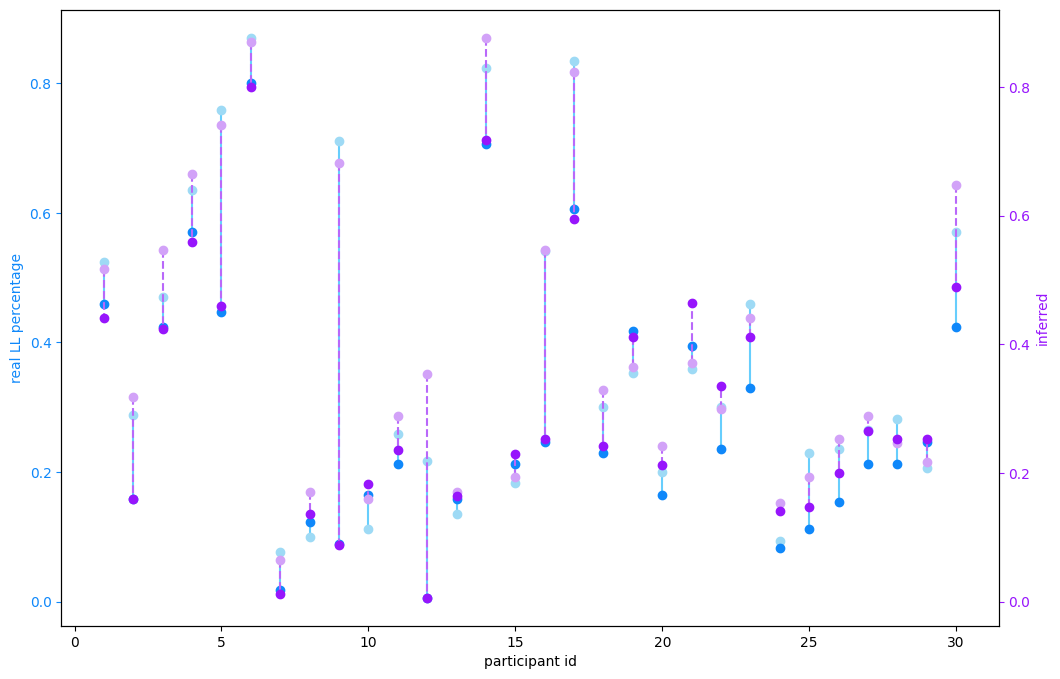

In [71]:
# plot real percentage and infered parameters together
fig, ax = plt.subplots(figsize=(15,8))

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# lighter dots are cafe and darker dots are gamble
# plot the real percentage (blue)
for i in range(len(line_data)):
    x = [i+1, i+1]
    y = [line_data[i][0], line_data[i][1]]
    axes[0].plot(x, y, color="#67cefd", ls = '-')
    axes[0].plot(i+1, y[0], color ="#9edaf5", marker = "o")
    axes[0].plot(i+1, y[1], color = "#0f88fa", marker = "o")
axes[0].set_ylabel("real LL percentage", color = "#0f88fa")
axes[0].tick_params(axis='y', colors = "#0f88fa")
axes[0].set_xlabel("participant id")

# inferred percentages (purple)
for i in range(len(infer_line)):
    x = [i+1, i+1]
    y_inferred = [infer_line[i][0], infer_line[i][1]]
    axes[1].plot(x, y_inferred, color="#b968fa", ls = "--")
    axes[1].plot(i+1, y_inferred[0], color = "#d2a2f8", marker = "o")
    axes[1].plot(i+1, y_inferred[1], color = "#9715fc", marker = "o")
axes[1].set_ylabel("inferred", color = "#9715fc")
axes[1].tick_params(axis='y', colors = "#9715fc")

# big_gap = [1, 4, 8, 11, 13, 15, 16, 22, 24, 29]
# # inferred percentages (purple)
# for i in range(len(big_gap)):
#     x = [big_gap[i]+1, big_gap[i]+1]
#     y_inferred = [infer_line[i][0], infer_line[i][1]]
#     axes[1].plot(x, y_inferred, color="#b968fa", ls = "--")
#     axes[1].plot(big_gap[i]+1, y_inferred[0], color = "#d2a2f8", marker = "o")
#     axes[1].plot(big_gap[i]+1, y_inferred[1], color = "#9715fc", marker = "o")
# axes[1].set_ylabel("inferred", color = "#9715fc")
# axes[1].tick_params(axis='y', colors = "#9715fc")


plt.show()

Check the correctly predicted percentage.

In [72]:
# create only one dimension array
# get how many are correctly predicted
real_response = real_data[:,:,4].view(-1)
num = 0
for i in range(len(real_response)):
    if inferred_response.view(-1)[i] == real_response[i]:
        num = num + 1

In [73]:
num/len(real_response)

0.8565686274509804

Plot the parameters with the real LL choosing percentage.

In [479]:
# plot_pos_param = pos_sigma_es.reshape(2,30) - pos_sigma_u.reshape(2,30)
plot_param = pos_sigma_es.reshape(2,30)

In [481]:
np.corrcoef(pos_sigma_u, pos_sigma_es)

array([[1.        , 0.07775218],
       [0.07775218, 1.        ]])

In [482]:
# separate to pairs so can make line plot
param_line = []
for i,j in zip(plot_param[0], plot_param[1]):
    param_line.append([i,j])

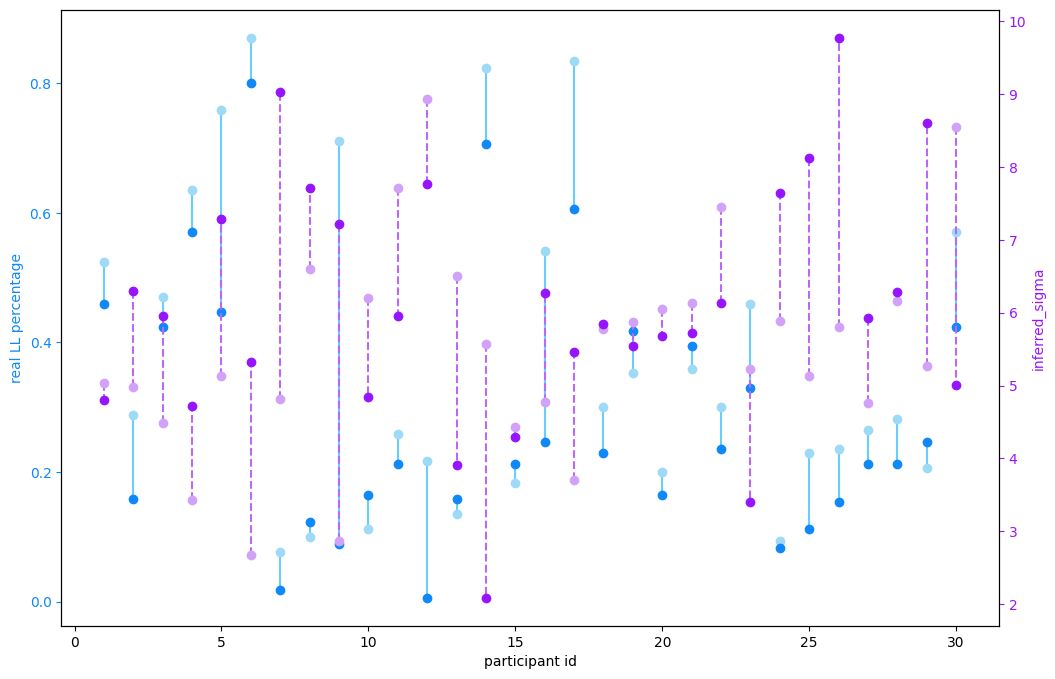

In [483]:
# plot real percentage and infered parameters together
fig, ax = plt.subplots(figsize=(15,8))

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# lighter dots are cafe and darker dots are gamble
# plot the real percentage (blue)
for i in range(len(line_data)):
    x = [i+1, i+1]
    y = [line_data[i][0], line_data[i][1]]
    axes[0].plot(x, y, color="#67cefd", ls = '-')
    axes[0].plot(i+1, y[0], color ="#9edaf5", marker = "o")
    axes[0].plot(i+1, y[1], color = "#0f88fa", marker = "o")
axes[0].set_ylabel("real LL percentage", color = "#0f88fa")
axes[0].tick_params(axis='y', colors = "#0f88fa")
axes[0].set_xlabel("participant id")

# inferred percentages (purple)
for i in range(len(param_line)):
    x = [i+1, i+1]
    y_inferred = [param_line[i][0], param_line[i][1]]
    axes[1].plot(x, y_inferred, color="#b968fa", ls = "--")
    axes[1].plot(i+1, y_inferred[0], color = "#d2a2f8", marker = "o")
    axes[1].plot(i+1, y_inferred[1], color = "#9715fc", marker = "o")
axes[1].set_ylabel("inferred_sigma", color = "#9715fc")
axes[1].tick_params(axis='y', colors = "#9715fc")



plt.show()